In [1]:
import os
import sys
sys.path.insert(0,'..')

from bidst.transformers import SkullStrippingTransformer
from shutil import rmtree
if os.path.exists('../bidst/tests/data/ds114/derivatives/'):
    rmtree('../bidst/tests/data/ds114/derivatives/')

# Dataset

There we have a dataset of T1w (and another) images with two sessions: 'test' and 'retest'.

In [2]:
!tree ../bidst/tests/data/ds114/

../bidst/tests/data/ds114/
├── sub-01
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-01_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-01_ses-test_T1w.nii.gz
├── sub-02
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-02_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-02_ses-test_T1w.nii.gz
├── sub-03
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-03_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-03_ses-test_T1w.nii.gz
└── sub-04
    ├── ses-retest
    │   └── anat
    │       └── sub-04_ses-retest_T1w.nii.gz
    └── ses-test
        └── anat
            └── sub-04_ses-test_T1w.nii.gz

20 directories, 8 files


# Transformation for all sessions (We use IDs only)

There we will make skull stripping for each session and subject, i.e. transformation will be done for all T1w images.

In [3]:
data_dir = os.path.abspath('..') + '/bidst/tests/data/ds114'
pipeline_name = 'test_SkullStrippingTransformer_ds114'
search_param = dict(extensions='T1w.nii.gz')

IDS = ['01', '02', '03']

transformer = SkullStrippingTransformer(data_dir=data_dir,
                                        pipeline_name=pipeline_name,
                                        search_param=search_param)
transformer.fit_transform(IDS)

['01', '02', '03']

As you see a new directory called 'derivatives' was created.

In [4]:
!tree ../bidst/tests/data/ds114

../bidst/tests/data/ds114
├── derivatives
│   └── test_SkullStrippingTransformer_ds114
│       ├── sub-01
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       └── sub-01_ses-retest_T1w_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           └── sub-01_ses-test_T1w_brain.nii.gz
│       ├── sub-02
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       └── sub-02_ses-retest_T1w_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           └── sub-02_ses-test_T1w_brain.nii.gz
│       └── sub-03
│           ├── ses-retest
│           │   └── anat
│           │       └── sub-03_ses-retest_T1w_brain.nii.gz
│           └── ses-test
│               └── anat
│                   └── sub-03_ses-test_T1w_brain.nii.gz
├── sub-01
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-01_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-01_ses-test_T1w.nii.gz
├── sub-02
│   ├── ses-retest
│  

# Visualization

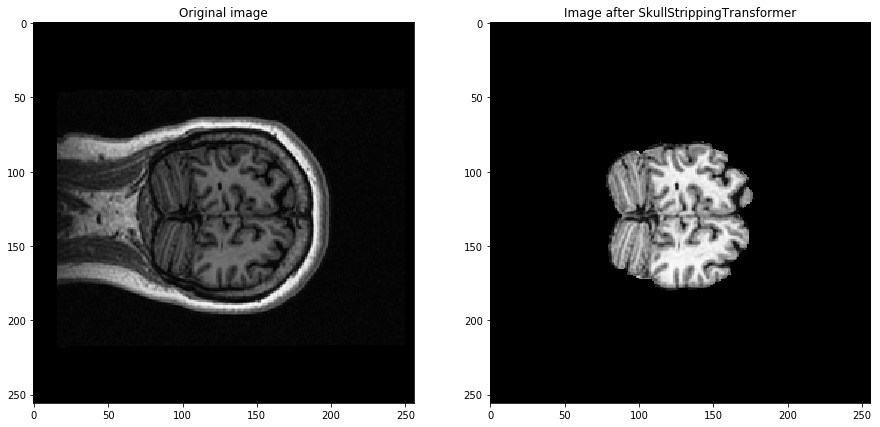

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

img_proc = nib.load('../bidst/tests/data/ds114/derivatives/test_SkullStrippingTransformer_ds114/sub-01/ses-retest/anat/sub-01_ses-retest_T1w_brain.nii.gz')
img_orig = nib.load('../bidst/tests/data/ds114/sub-01/ses-retest/anat/sub-01_ses-retest_T1w.nii.gz')

check_slice = 36
plt.figure(figsize=(15, 30))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img_orig.get_data()[:, check_slice, :], cmap='Greys_r')


plt.subplot(122)
plt.title('Image after SkullStrippingTransformer')
plt.imshow(img_proc.get_data()[:, check_slice, :], cmap='Greys_r')

In [7]:
img_orig.get_data().shape

(256, 156, 256)

# Transformation for specified sessions 
# (We specify both IDs and session using tuples)

Now we've done skullstripping for all subjects we have. If we start skull stripping for specific sessions and subjects nothing will be changed. To avoid it and see a result we'll add 'variant' tag.

In [8]:
IDS = [('02', 'test'), 
       ('03', 'test'),
       ('03', 'retest')]

transformer = SkullStrippingTransformer(data_dir=data_dir,
                                        pipeline_name=pipeline_name,
                                        search_param=search_param,
                                        variant='tuples')
transformer.fit_transform(IDS)

[('02', 'test'), ('03', 'test'), ('03', 'retest')]

As you see, new images were created with tag '_variant-tuples'.

In [9]:
!tree ../bidst/tests/data/ds114

../bidst/tests/data/ds114
├── derivatives
│   └── test_SkullStrippingTransformer_ds114
│       ├── sub-01
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       └── sub-01_ses-retest_T1w_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           └── sub-01_ses-test_T1w_brain.nii.gz
│       ├── sub-02
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       └── sub-02_ses-retest_T1w_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           ├── sub-02_ses-test_T1w_brain.nii.gz
│       │           └── sub-02_ses-test_T1w_variant-tuples_brain.nii.gz
│       └── sub-03
│           ├── ses-retest
│           │   └── anat
│           │       ├── sub-03_ses-retest_T1w_brain.nii.gz
│           │       └── sub-03_ses-retest_T1w_variant-tuples_brain.nii.gz
│           └── ses-test
│               └── anat
│                   ├── sub-03_ses-test_T1w_brain.nii.gz
│                   └── sub-03_ses-test_T1w_variant-tupl

# Tags usage and setting parameters for FSL Skull-stripping

We use tag 'variant' to separate these transformations with different parameters or groups of subjects with sessions. For example, we want to take another subjects and session and set different FSL Skull-stripping parameters. To separate these images from previous we'll use '_variant-parameters'

In [10]:
transform_param = dict(frac=0.7)

IDS = [('01', 'test'), 
       ('01', 'retest'),
       ('02', 'retest')]

transformer = SkullStrippingTransformer(data_dir=data_dir,
                                        pipeline_name=pipeline_name,
                                        search_param=search_param,
                                        transform_param=transform_param,
                                        variant='parameters')
transformer.fit_transform(IDS)

[('01', 'test'), ('01', 'retest'), ('02', 'retest')]

In [11]:
!tree ../bidst/tests/data/ds114

../bidst/tests/data/ds114
├── derivatives
│   └── test_SkullStrippingTransformer_ds114
│       ├── sub-01
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       ├── sub-01_ses-retest_T1w_brain.nii.gz
│       │   │       └── sub-01_ses-retest_T1w_variant-parameters_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           ├── sub-01_ses-test_T1w_brain.nii.gz
│       │           └── sub-01_ses-test_T1w_variant-parameters_brain.nii.gz
│       ├── sub-02
│       │   ├── ses-retest
│       │   │   └── anat
│       │   │       ├── sub-02_ses-retest_T1w_brain.nii.gz
│       │   │       └── sub-02_ses-retest_T1w_variant-parameters_brain.nii.gz
│       │   └── ses-test
│       │       └── anat
│       │           ├── sub-02_ses-test_T1w_brain.nii.gz
│       │           └── sub-02_ses-test_T1w_variant-tuples_brain.nii.gz
│       └── sub-03
│           ├── ses-retest
│           │   └── anat
│           │       ├── sub-03_ses-retest_T1w_brain.nii.gz
│    